# Reproducing GW memory results from Mitman et al. (2021)

This example is adopted from <https://gist.github.com/moble/819a123a243d77565e9924ab5c664e00>

In [3]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import sxs

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # To quiet warnings about spin weight not being set
    h = sxs.load("../data_gwmem_2022/SXS-BBH_ExtCCE-0001/Lev5/rhOverM_Extrapolated_N5_CoM_Mem.json")
    psi2 = sxs.load("../data_gwmem_2022/SXS-BBH_ExtCCE-0001/Lev5/r3Psi2OverM_Extrapolated_N5_CoM.json")

h._metadata['spin_weight'] = -2
psi2._metadata['spin_weight'] = 0

peak_time = h.max_norm_time()
i1, i2 = 0, h.n_times
ia, ib = h.index_closest_to(peak_time-220), h.index_closest_to(peak_time+170)


In [6]:
h_𝓔 = sxs.waveforms.memory.add_memory(h[i1:i2])

In [7]:
J_m = sxs.waveforms.memory.J_m(h[i1:i2], psi2[i1:i2]) 
J_𝓔 = sxs.waveforms.memory.J_E(h[i1:i2])
J_N̂ = sxs.waveforms.memory.J_Nhat(h[i1:i2], psi2[i1:i2])
J_𝓙 = sxs.waveforms.memory.J_J(h[i1:i2])

In [11]:
J = J_m + J_N̂ + J_𝓙 + J_𝓔

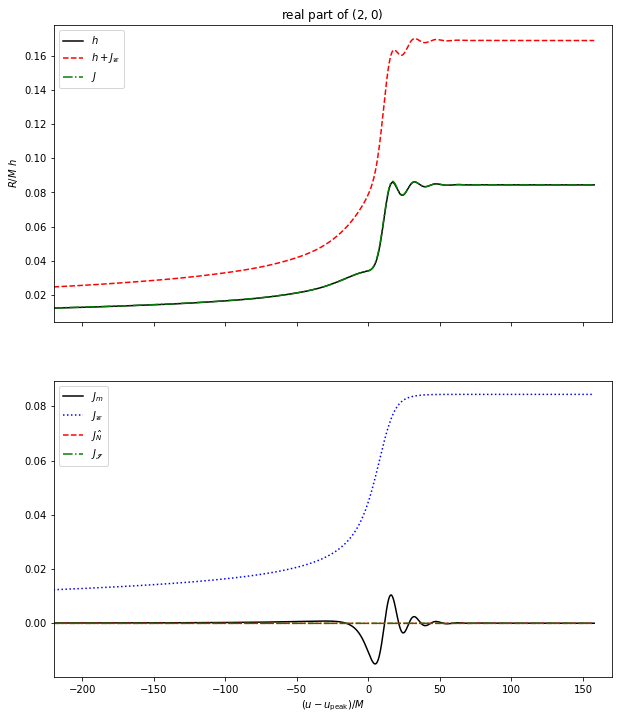

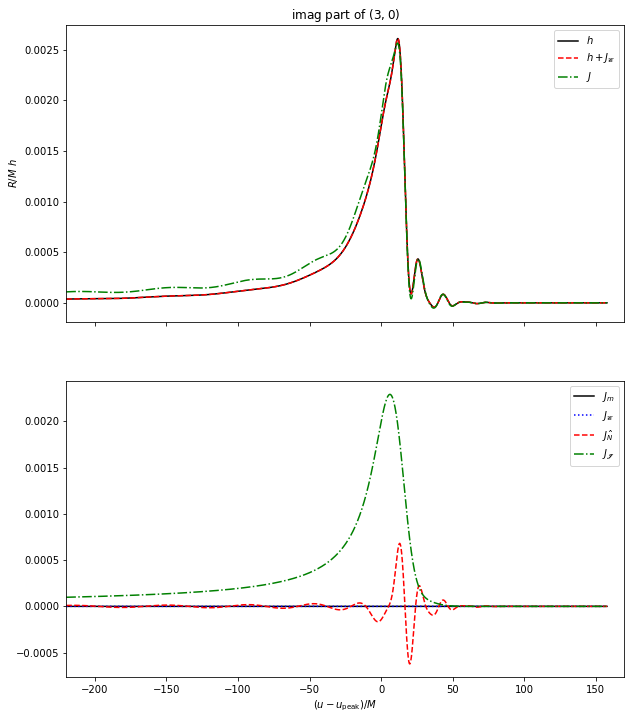

In [12]:
for ell, part in [(2, np.real), (3, np.imag)]:
    fig, axes = plt.subplots(2, sharex=True, figsize=(10, 12))
    axes[0].plot(h.t[ia:ib]-peak_time, part(h[ia:ib, h.index(ell, 0)].ndarray), color='black')
    axes[0].plot(h_𝓔.t[ia:ib]-peak_time, part(h_𝓔[ia:ib, h_𝓔.index(ell, 0)].ndarray), ls='dashed', color='red')
    axes[0].plot(J.t[ia:ib]-peak_time, part(J[ia:ib, J.index(ell, 0)].ndarray), ls='dashdot', color='green')
    axes[0].set_title(rf'{part.__name__} part of $({ell}, 0)$')
    axes[0].set_ylabel(r'$R/M\ h$')
    axes[0].legend([r'$h$', r'$h + J_{𝓔}$', r'$J$'])
    axes[0].set_xlim(-220, 170)

    axes[1].plot(J_m.t[ia:ib]-peak_time, part(J_m[ia:ib, J_m.index(ell, 0)].ndarray), ls='solid', color='black')
    axes[1].plot(J_𝓔.t[ia:ib]-peak_time, part(J_𝓔[ia:ib, J_𝓔.index(ell, 0)].ndarray), ls='dotted', color='blue')
    axes[1].plot(J_N̂.t[ia:ib]-peak_time, part(J_N̂[ia:ib, J_N̂.index(ell, 0)].ndarray), ls='dashed', color='red')
    axes[1].plot(J_𝓙.t[ia:ib]-peak_time, part(J_𝓙[ia:ib, J_𝓙.index(ell, 0)].ndarray), ls='dashdot', color='green')
    axes[1].legend(['$J_m$', '$J_𝓔$', '$J_N̂$', '$J_𝓙$'])
    axes[1].set_xlabel(r'$(u - u_{\mathrm{peak}}) / M$')


Unlike the linked notebook, the waveform we loaded already contained memory $J_E$, so adding it on top doubled the memory contribution (red dashed line, first plot).

Text(0.5, 0, '$(u - u_{\\mathrm{peak}}) / M$')

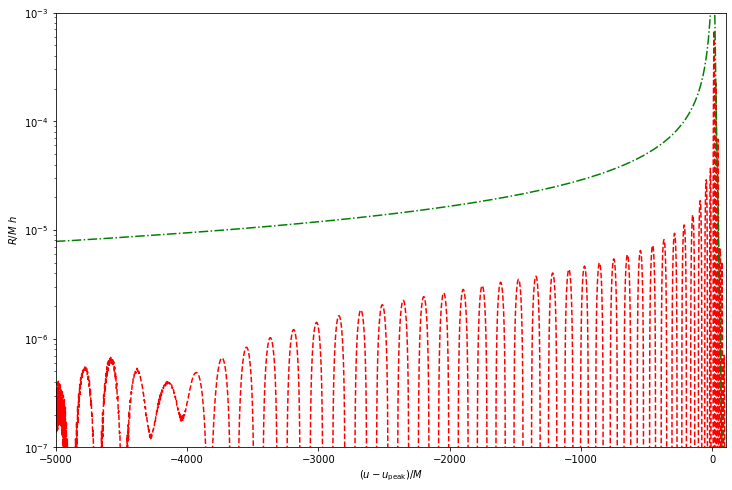

In [25]:
fig = plt.figure(figsize=(12, 8))
plt.semilogy(J_m.t[:]-peak_time, np.imag(J_m[:, J_m.index(3, 0)].ndarray), ls='solid', color='black')
plt.semilogy(J_𝓔.t[:]-peak_time, np.imag(J_𝓔[:, J_𝓔.index(3, 0)].ndarray), ls='dotted', color='blue')
plt.semilogy(J_N̂.t[:]-peak_time, np.imag(J_N̂[:, J_N̂.index(3, 0)].ndarray), ls='dashed', color='red')
plt.semilogy(J_𝓙.t[:]-peak_time, np.imag(J_𝓙[:, J_𝓙.index(3, 0)].ndarray), ls='dashdot', color='green')
plt.xlim([-5000,100])
plt.ylim([1e-7,1e-3])
plt.ylabel('$R/M\ h$')
plt.xlabel('$(u - u_{\mathrm{peak}}) / M$')